In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pylab as pl
from IPython import display
import time
from matplotlib import animation 
from mpl_toolkits import mplot3d
%matplotlib inline
plt.style.use('ggplot')
from pylab import figure, subplot, hist, xlim, show

In [2]:
#Getting groups interaction data from excel  to panda dataframe
group1_1 = pd.read_excel('C:\Users\User\Desktop\Destop13_04_2020\StudyData1\group1_1.xlsx')
group2_1 = pd.read_excel('C:\Users\User\Desktop\Destop13_04_2020\StudyData1\group2_1.xlsx')
group3_1 = pd.read_excel('C:\Users\User\Desktop\Destop13_04_2020\StudyData1\group6_1.xlsx')
group4_1 = pd.read_excel('C:\Users\User\Desktop\Destop13_04_2020\StudyData1\group3_1.xlsx')
group5_1 = pd.read_excel('C:\Users\User\Desktop\Destop13_04_2020\StudyData1\group5_1.xlsx')

In [3]:
group1_1 = group1_1[group1_1['Word Count']>0]
group2_1 = group2_1[group2_1['Word Count']>0]
group3_1 = group3_1[group3_1['Word Count']>0]
group4_1 = group4_1[group4_1['Word Count']>0]
group5_1 = group5_1[group5_1['Word Count']>0]



In [4]:
grp1MemList = ['Ranco','Lucas', 'charis',  'United']
grp2MemList = ['Carbon', 'oluwalonimi', 'smith', 'Arrival']
grp3MemList = ['cls603','Epigha', 'Beowulf', 'Anonymous1']
grp4MemList = ['smart', 'Swift', 'jade', 'the unknown']
grp5MemList = ['Craig', 'sir D', 'Karatu', 'Mide']

In [5]:
def getMemDiscourseData2(group, memList):
    grpMemDiscourse = []
    for mem in memList:
        memData=group.loc[group['username'] == mem]
        grpMemDiscourse.append(memData)
    
    return grpMemDiscourse

In [6]:
grp1Data_par_mem= getMemDiscourseData2(group1_1, grp1MemList)
grp2Data_par_mem= getMemDiscourseData2(group2_1, grp2MemList)
grp3Data_par_mem= getMemDiscourseData2(group3_1, grp3MemList)
grp4Data_par_mem= getMemDiscourseData2(group4_1, grp4MemList)
grp5Data_par_mem= getMemDiscourseData2(group5_1, grp5MemList)


#grp3Data_par_mem[0].to_csv('C:/Users/User/Desktop/StudyData1/writeUp_data/mem1Data.csv')
#grp3Data_par_mem[1].to_csv('C:/Users/User/Desktop/StudyData1/writeUp_data/mem2Data.csv')
#grp3Data_par_mem[2].to_csv('C:/Users/User/Desktop/StudyData1/writeUp_data/mem3Data.csv')
#grp3Data_par_mem[3].to_csv('C:/Users/User/Desktop/StudyData1/writeUp_data/mem4Data.csv')


In [7]:
def getIndivParticipation(grpSData):
    grpMemContribVol = []
    
    for memData in grpSData:
        memContribVol = memData['Word Count'].tolist()
        memContribVolTotal= sum(memContribVol) 
        grpMemContribVol.append(memContribVolTotal)
        
    return grpMemContribVol



In [8]:
grp1VolSet = getIndivParticipation(grp1Data_par_mem)
grp2VolSet = getIndivParticipation(grp2Data_par_mem)
grp3VolSet = getIndivParticipation(grp3Data_par_mem)
grp4VolSet = getIndivParticipation(grp4Data_par_mem)
grp5VolSet = getIndivParticipation(grp5Data_par_mem)

allGroupsVolSet = [grp1VolSet,grp2VolSet,grp3VolSet, grp4VolSet,grp5VolSet]

In [9]:
def getGrpsMedianActivity(allGrps):
    allGrpMedia = []
    for grp in allGrps:
        grpMed=np.median(grp)
        allGrpMedia.append(grpMed)
          
    return allGrpMedia
    
allGrpMed =getGrpsMedianActivity(allGroupsVolSet)   

print allGrpMed[4]

226.5


In [10]:
def allGrpsActivityMean(allGrps):
    allGrpsMean=[]
    for grp in allGrps:
        tempMean = np.mean(grp)
        allGrpsMean.append(tempMean)
    
    return allGrpsMean

grpsMeanSet = allGrpsActivityMean(allGroupsVolSet)

print grpsMeanSet[2]

213.5


In [11]:
def wcGiniCoefModel2(allGrpsWCVolSet):
    meanSet=allGrpsActivityMean(allGrpsWCVolSet)
    allGrpsGiniCoef = []
    for data, mean in zip(allGrpsWCVolSet, meanSet):
        summ=0
        for i in data:
            n=data.index(i)+1    
            for j in data[n:]:
                summ+=abs(i-j)
            GiniCoefMeasure = summ/(2*(len(data)**2)*mean)
        
        allGrpsGiniCoef.append(GiniCoefMeasure)
    return allGrpsGiniCoef

In [12]:
giniSet = wcGiniCoefModel2(allGroupsVolSet)

print giniSet[4]

0.160416666667


In [13]:
def wcGiniCoefColabMeasure(grpSGiniCoef, grpSmedianActivity):
    colabMeasureBetweenGrps = []
    for symmetry, median in zip(grpSGiniCoef, grpSmedianActivity):
        colabLevel = median/symmetry
        
        colabMeasureBetweenGrps.append(colabLevel)
    
    
    return colabMeasureBetweenGrps


betweenGrpsMeasure= wcGiniCoefColabMeasure(giniSet, allGrpMed)

print betweenGrpsMeasure[4]

1411.94805195


In [21]:
print betweenGrpsMeasure[0]
print betweenGrpsMeasure[1]
print betweenGrpsMeasure[2]
print betweenGrpsMeasure[3]
print betweenGrpsMeasure[4]

842.237288136
1029.93814433
1537.95575221
796.24
1411.94805195


In [17]:
def plotWithin_Between_Grp(grpSColabL,grpSMemWC):
    
    fig = plt.figure()
    
    grpSColabLevel = grpSColabL
    grp1MemWC = grpSMemWC[0]
    grp2MemWC = grpSMemWC[1]
    grp3MemWC = grpSMemWC[2]
    grp4MemWC = grpSMemWC[3]
    grp5MemWC = grpSMemWC[4]
    #Get the row lenght of group with maximum row
    x = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
    betweenGrp=[grpSColabLevel[0], grpSColabLevel[1], grpSColabLevel[2], grpSColabLevel[3], grpSColabLevel[4]]
    x_pos = [j for j, _ in enumerate(grpSColabLevel)]
        
    #g1Mem=withinGroupIndivCon(selectFromGroup(grList[0],i), allGpMem[0])
    #g2Mem=withinGroupIndivCon(selectFromGroup(grList[1],i), allGpMem[1])
    #g3Mem=withinGroupIndivCon(selectFromGroup(grList[2],i), allGpMem[2])
    #g4Mem=withinGroupIndivCon(selectFromGroup(grList[3],i), allGpMem[3])
    #g5Mem=withinGroupIndivCon(selectFromGroup(grList[4],i), allGpMem[4])
    
    allMem1=[grp1MemWC[0], grp2MemWC[0], grp3MemWC[0], grp4MemWC[0], grp5MemWC[0]]
    allMem2=[grp1MemWC[1], grp2MemWC[1], grp3MemWC[1], grp4MemWC[1], grp5MemWC[1]]
    allMem3=[grp1MemWC[2], grp2MemWC[2], grp3MemWC[2], grp4MemWC[2], grp5MemWC[2]]
    allMem4=[grp1MemWC[3], grp2MemWC[3], grp2MemWC[3], grp4MemWC[3], grp5MemWC[3]]
        
    plotList = [allMem1, allMem2, allMem3, allMem4]
        
    N = 5
    ind = np.arange(N) 
    width = 0.2  
        
    plt.subplot(2, 1, 1) 
    #plt.bar(x_pos, grpList, color='green')
    barList= plt.bar(x_pos, grpSColabLevel)
    barList[0].set_color('g')
    barList[1].set_color('r')
    barList[2].set_color('b')
    barList[3].set_color('y')
    barList[4].set_color('c')
    plt.xlabel("Groups")
        #plt.ylabel("Group Colab. \n Measure")
        #plt.title("Between-groups measure of colabo. &\n Within-group measure of contrib.")
    plt.xticks(x_pos, x)
        
    plt.subplot(2, 1, 2)
    plt.bar(ind, plotList[0], width, label='M1')
    plt.bar(ind + width, plotList[1], width, label='M2')
    plt.bar(ind + width+width, plotList[2], width,label='M3')
    plt.bar(ind + width+width+width, plotList[3], width,label='M4')
        
        
        #plt.ylabel('Indiv. Contrib. \n Measure')
        #plt.title('Within Group visualization of individuals contribution')

    plt.xticks(ind + width / 2, ('Group1', 'Group2', 'Group3', 'Group4', 'Group5'))
    #plt.savefig('C:/Users/User/Desktop/StudyData1/gcmsView.jpg')
    plt.legend(loc='best') 
        
    display.clear_output(wait=True)
    display.display(plt.show())

                            

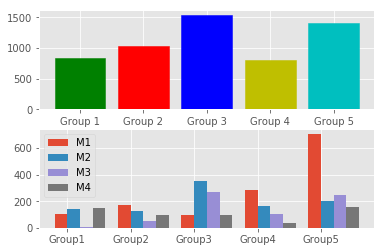

None

In [18]:
plotWithin_Between_Grp(betweenGrpsMeasure,allGroupsVolSet)

In [ ]:
def selectFromGroup(gr, num):
    grpO = gr
    grpDataL=gr.shape[0]  #get the number of rows in group data
    
    if num<grpDataL:  #check if 'num' is not more that the number of rows in groupData
        grp=gr.iloc[0:num] # get first 'num' rows of dataframe
        #grp['Word Count']=0
        return grp
    else:
        return grpO


In [ ]:
def compactPlotWcGCMS(allGrps, allMemList):
    #getMemDiscourseData2(group, memList)
    
    grp1Data_par_mem= getMemDiscourseData2(allGrps[0], allMemList[0])
    grp2Data_par_mem= getMemDiscourseData2(allGrps[1], allMemList[1])
    grp3Data_par_mem= getMemDiscourseData2(allGrps[2], allMemList[2])
    grp4Data_par_mem= getMemDiscourseData2(allGrps[3], allMemList[3])
    grp5Data_par_mem= getMemDiscourseData2(allGrps[4], allMemList[4])
    
    #getIndivParticipation(grpSData)
    
    
    grp1VolSet = getIndivParticipation(grp1Data_par_mem)
    grp2VolSet = getIndivParticipation(grp2Data_par_mem)
    grp3VolSet = getIndivParticipation(grp3Data_par_mem)
    grp4VolSet = getIndivParticipation(grp4Data_par_mem)
    grp5VolSet = getIndivParticipation(grp5Data_par_mem)

    allGroupsVolSet = [grp1VolSet,grp2VolSet,grp3VolSet, grp4VolSet,grp5VolSet]
    
    allGrpMed =getGrpsMedianActivity(allGroupsVolSet)
    
    grpsMeanSet = allGrpsActivityMean(allGroupsVolSet)
    
    giniSet = wcGiniCoefModel2(allGroupsVolSet)
    
    betweenGrpsMeasure= wcGiniCoefColabMeasure(giniSet, allGrpMed)
    
    plotWithin_Between_Grp(betweenGrpsMeasure,allGroupsVolSet)

In [ ]:
grpS =[group1_1, group2_1, group3_1, group4_1, group5_1]
memSList =[grp1MemList, grp2MemList, grp3MemList, grp4MemList, grp5MemList]

In [ ]:
compactPlotWcGCMS(grpS, memSList)

In [ ]:
grpList,timeList =  selectFromGroup(grpS, memSList, 5)



In [ ]:
plt.plot(timeList, grpList[0], color='g', label ='group 1')
plt.plot(timeList, grpList[1], color='r', label ='group 2')
plt.plot(timeList, grpList[2], color='b', label='group 3')
plt.plot(timeList, grpList[3], color='y', label='group 4')
plt.plot(timeList, grpList[4], color='c', label='group 5')

#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time intervals')
plt.ylabel('Collaboration Level')
#plt.title('Real-time measure of collaboration')

plt.legend()
#plt.savefig('C:/Users/User/Desktop/Study3/StudyData1/realTimeGroupColab.jpg') 
plt.show()
